### Import Torch

In [1]:
import torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Download MNIST dataset

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = './data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = './data', 
    train = False, 
    transform = ToTensor()
)

### Visualize MNIST dataset

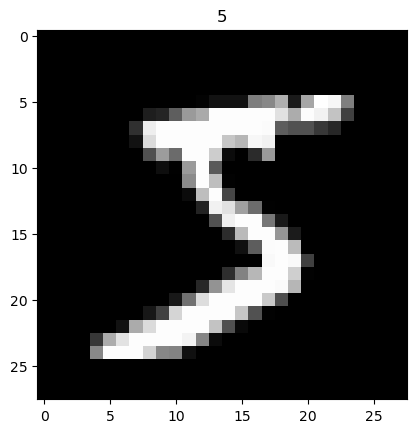

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

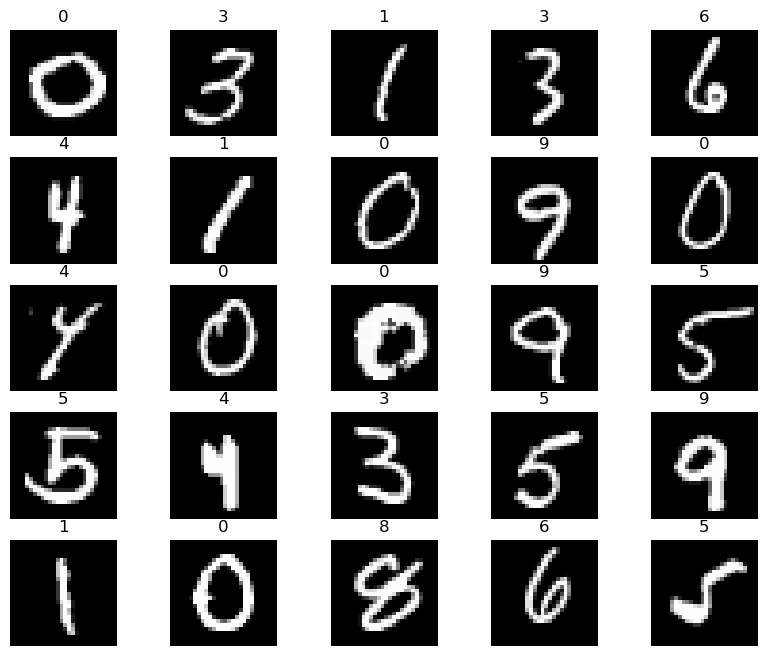

In [4]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Split the training dataset into training and validation datasets

In [5]:
from sklearn.model_selection import train_test_split

# your code here
train_data, val_data = train_test_split(train_data, test_size = 0.1, random_state = 123, shuffle = True)
print(len(test_data))
train_data[0][0].size()

10000


torch.Size([1, 28, 28])

### Prepare for the datasets using dataloader

In [6]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    'val'  : torch.utils.data.DataLoader(val_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=False, 
                                          num_workers=1),
}
#loaders['train'][0][0].size()

### Import nn module from torch

In [7]:
from torch import nn
import torch.nn.functional as F

### Set hyperparameters

In [8]:
# Set hyperparameters before building the model
num_classes = 10
batch_size = 100
num_epochs = 10
learning_rate = 0.01 

### Build a CNN model for image classification task

In [19]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()        
        # your code here
        self.c1 = nn.Conv2d(1, 32, 3, padding=1)
        self.c2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.l1 = nn.Linear(64*7*7, 128)
        self.l2 = nn.Linear(128, 10)
        
        
    def forward(self, x):
        # your code here
        x = self.c1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.c2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64*7*7)
        x = self.l1(x)
        x = nn.functional.relu(x)
        x = self.l2(x)
        
        return x# your code here
        

model = CNN(num_classes) #.to(device)
print(model)

CNN(
  (c1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (c2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (l1): Linear(in_features=3136, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
)


### Set a loss function

In [20]:
loss_func = nn.CrossEntropyLoss().to(device) # to(device) 해야되나 your code here

### Set an optimizer

In [21]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)   # your code here

### Train the CNN Model

In [22]:
def train(num_epochs, model, loaders):
        
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        # Train the model
        # your code here
        total_loss = 0.0
        for image, label in loaders['train']:
            output = model(image)
            #label = label.to(device) #GPU 있으면 필요있는 코드?
            loss = loss_func(output, label)
            total_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("total_loss = ", total_loss)

                
        # Validate the model
        # your code here
        with torch.no_grad():
            total_right = 0
            for image, label in loaders['val']:
                output = model(image)
                #label = label.to(device)
                right = (output.max(1)[1] == label).sum()
                total_right += right
            print(total_right / len(loaders['val'].dataset))
                
        
        
        
train(num_epochs, model, loaders)

total_loss =  tensor(104.8638, grad_fn=<AddBackward0>)
tensor(0.9738)
total_loss =  tensor(39.8397, grad_fn=<AddBackward0>)
tensor(0.9732)
total_loss =  tensor(31.6771, grad_fn=<AddBackward0>)
tensor(0.9768)
total_loss =  tensor(28.9667, grad_fn=<AddBackward0>)
tensor(0.9793)
total_loss =  tensor(24.5948, grad_fn=<AddBackward0>)
tensor(0.9778)
total_loss =  tensor(26.8816, grad_fn=<AddBackward0>)
tensor(0.9808)
total_loss =  tensor(24.7860, grad_fn=<AddBackward0>)
tensor(0.9765)
total_loss =  tensor(22.5496, grad_fn=<AddBackward0>)
tensor(0.9815)
total_loss =  tensor(21.5732, grad_fn=<AddBackward0>)
tensor(0.9787)
total_loss =  tensor(21.4599, grad_fn=<AddBackward0>)
tensor(0.9783)


### Evaluate the trained CNN model (compute accuracy on the test dataset)

In [43]:
# Test the model
# your code here
with torch.no_grad():
    total_right = 0
    for image, label in loaders['test']:
        output = model(image)
        label = label.to(device)
        right = (output.max(1)[1] == label).sum()
        total_right += right
    print(f"average accuracy : {total_right/len(loaders['test'].dataset)}")




average accuracy : 0.9700000286102295


### Show the results with randomly selected 10 samples from the test data

In [44]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
imgs = imgs
lbls = lbls
test_output = model(imgs[:10])
predicted = torch.max(test_output, 1)[1].data.cpu().numpy().squeeze()
labels = lbls[:10].cpu().numpy()
print(f"Predicted number: {predicted}")
print(f"Actual number:    {labels}")

Predicted number: [7 2 1 0 4 1 4 9 8 9]
Actual number:    [7 2 1 0 4 1 4 9 5 9]
